<a href="https://colab.research.google.com/github/BigyanBhatta/Deep-Learning-Improvement/blob/main/L2_regularization_in_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam


In [6]:
X, y  = make_moons(100, noise = 0.25, random_state = 2)

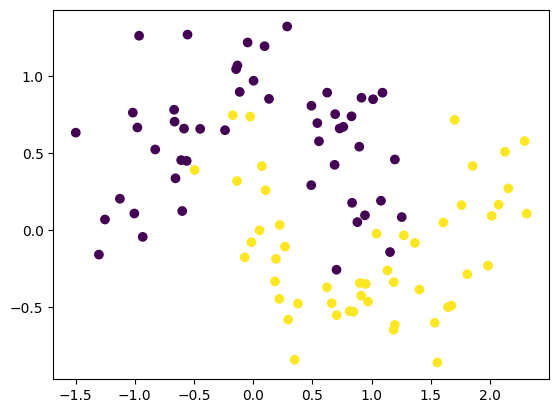

In [10]:
plt.scatter(X[:,0], X[:, -1], c = y)

In [11]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim  =2))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
adam = Adam(learning_rate = 0.01)
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = adam)
history = model.fit(X, y, epochs = 500, validation_split = 0.2, verbose = 0)

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

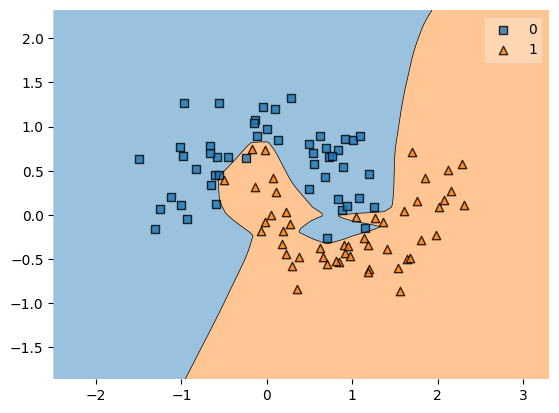

In [22]:
plot_decision_regions(X, y, clf = model)


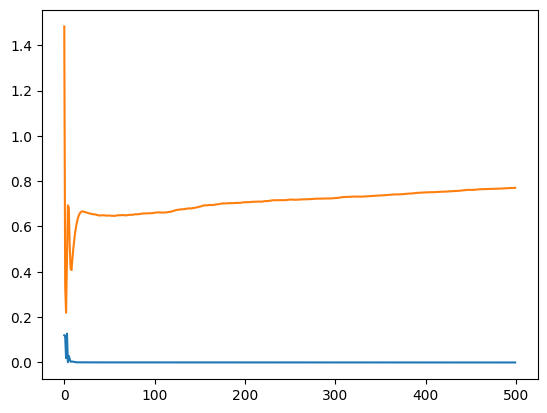

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [27]:
model1 = Sequential()
model1.add(Dense(128, activation = 'relu', input_dim = 2, kernel_regularizer = tensorflow.keras.regularizers.l2(0.03) ))
model1.add(Dense(128, activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.L2(0.03)))
model1.add(Dense(1, activation = 'sigmoid'))

In [29]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
adam = Adam(learning_rate = 0.01)
model1.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = adam)
history1 = model1.fit(X, y, validation_split = 0.2, verbose = 0, epochs = 1000, batch_size= 32)

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

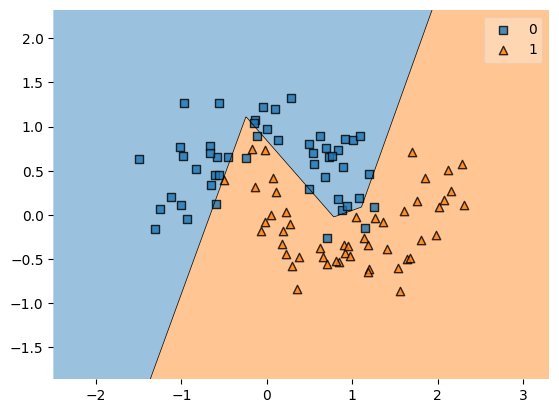

In [40]:
plot_decision_regions (X, y, clf = model1)

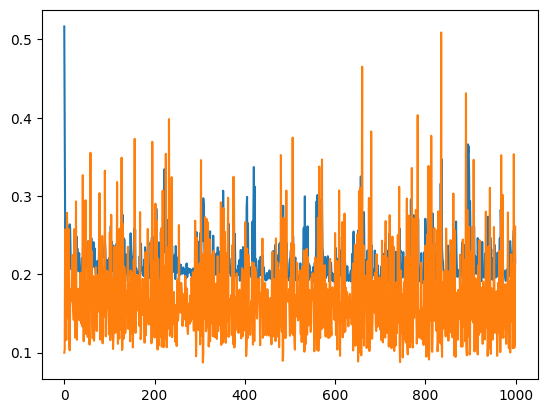

In [41]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])


In [49]:
model_no_reg = model.get_weights()[0].reshape(256)
model_with_reg = model1.get_weights()[0].reshape(256)

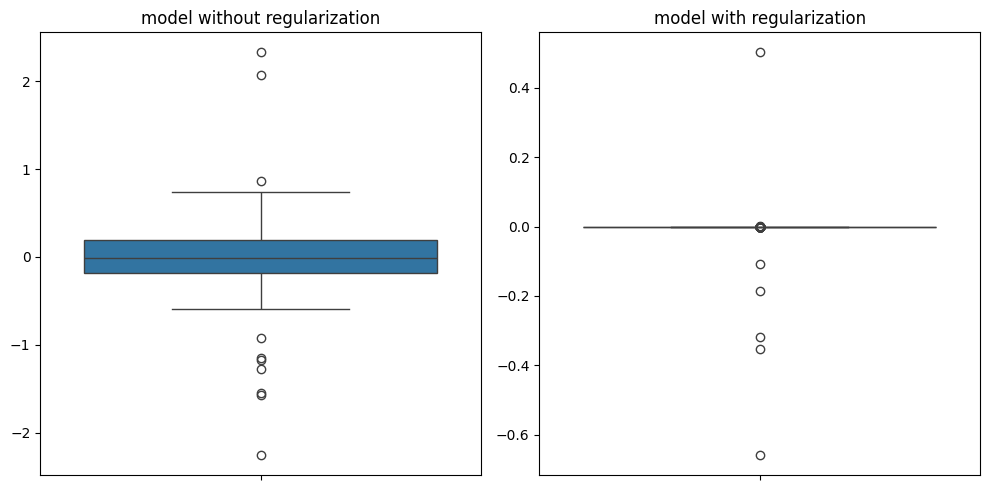

In [61]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.title('model without regularization')
sns.boxplot(model_no_reg)

plt.subplot(122)
plt.title('model with regularization')
sns.boxplot(model_with_reg)

plt.tight_layout()
plt.show()

In [59]:
model_with_reg.min()

-0.65871155

In [60]:
model_no_reg.min()

-2.2561529

15625/15625 [==============================] - 24s 2ms/step


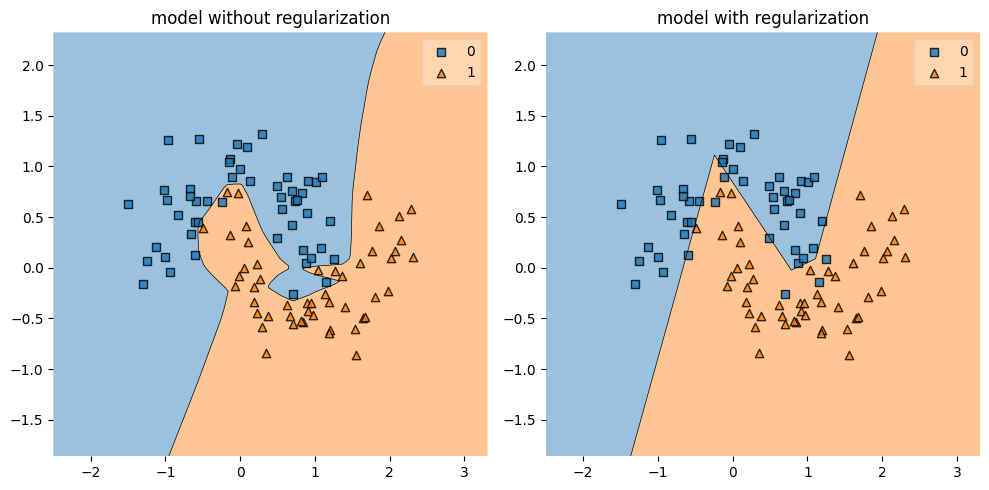

In [63]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.title('model without regularization')
plot_decision_regions (X, y, clf = model)

plt.subplot(122)
plt.title('model with regularization')
plot_decision_regions (X, y, clf = model1)

plt.tight_layout()
plt.show()